## INTRODUCTION -
##### This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The purpose of the data analysis is to capture the insights with the business data.

In [130]:
#importing libraries 
import numpy as np
import datetime as dt 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [131]:
df = pd.read_excel(r"C:\Users\lenovo\Desktop\Python programs\onlinedata.xlsx") #Read excel file 

In [132]:
df.head() #display 1st 5 rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


In [133]:
df.tail() #Displays last 5 rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-09-12 12:50:00,4.95,12680.0,France


In [135]:
df=df[['CustomerID','InvoiceNo','StockCode','Description','Quantity','UnitPrice','InvoiceDate','Country']] # Changed columns position to understand better

In [136]:
df.head()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,UnitPrice,InvoiceDate,Country
0,17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,2010-01-12 08:26:00,United Kingdom
1,17850.0,536365,71053,WHITE METAL LANTERN,6,3.39,2010-01-12 08:26:00,United Kingdom
2,17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,2010-01-12 08:26:00,United Kingdom
3,17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,2010-01-12 08:26:00,United Kingdom
4,17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,2010-01-12 08:26:00,United Kingdom


In [134]:
# Data Preprocessing
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [205]:
# Removing the null values since we are checking the data based on customer and description
df = df.dropna()
df.isnull().sum()
df.head()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,TotalAmount,UnitPrice,InvoiceDate,Country,year,month
0,17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,15.30,2.55,2010-01-12 08:26:00,United Kingdom,2010,1
1,17850.0,536365,71053,WHITE METAL LANTERN,6,20.34,3.39,2010-01-12 08:26:00,United Kingdom,2010,1
2,17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,22.00,2.75,2010-01-12 08:26:00,United Kingdom,2010,1
3,17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,20.34,3.39,2010-01-12 08:26:00,United Kingdom,2010,1
4,17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,20.34,3.39,2010-01-12 08:26:00,United Kingdom,2010,1


In [234]:
TotalAmount = df['Quantity'] * df['UnitPrice']
df.insert(loc=6,column='TotalAmt',value=TotalAmount) #Added one more column as TotalAmount 

In [237]:
df.head()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,TotalAmt,UnitPrice,InvoiceDate,Country,year,month
0,17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,15.30,2.55,2010-01-12 08:26:00,United Kingdom,2010,1
1,17850.0,536365,71053,WHITE METAL LANTERN,6,20.34,3.39,2010-01-12 08:26:00,United Kingdom,2010,1
2,17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,22.00,2.75,2010-01-12 08:26:00,United Kingdom,2010,1
3,17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,20.34,3.39,2010-01-12 08:26:00,United Kingdom,2010,1
4,17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,20.34,3.39,2010-01-12 08:26:00,United Kingdom,2010,1


In [139]:
country_price = df.groupby('Country')['Quantity'].sum().sort_values(ascending = False)
country_price

Country
United Kingdom          4263829
Netherlands              200128
EIRE                     142637
Germany                  117448
France                   110480
Australia                 83653
Sweden                    35637
Switzerland               30325
Spain                     26824
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16180
Finland                   10666
Channel Islands            9479
Denmark                    8188
Italy                      7999
Cyprus                     6317
Singapore                  5234
Austria                    4827
Hong Kong                  4769
Israel                     4353
Poland                     3653
Unspecified                3300
Canada                     2763
Iceland                    2458
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652


## Insights

### 1. Which countries has highest purchase ?

<AxesSubplot:xlabel='Country'>

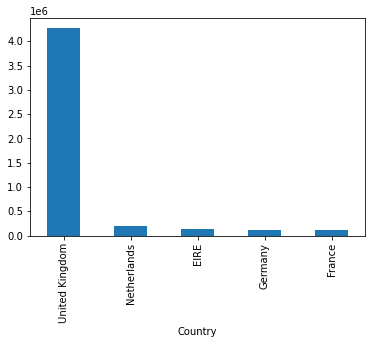

In [161]:
country_price[:5].plot(kind = 'bar')

### 2. 5 countries with least number of purchase and needs to increase more consumer base ? 

<AxesSubplot:xlabel='Country'>

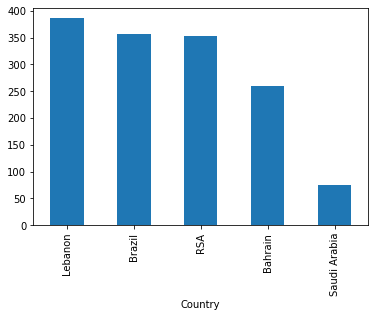

In [220]:
country_price[33:].plot(kind = 'bar')

In [177]:
df['InvoiceDate'] 

0         2010-01-12 08:26:00
1         2010-01-12 08:26:00
2         2010-01-12 08:26:00
3         2010-01-12 08:26:00
4         2010-01-12 08:26:00
                 ...         
541904    2011-09-12 12:50:00
541905    2011-09-12 12:50:00
541906    2011-09-12 12:50:00
541907    2011-09-12 12:50:00
541908    2011-09-12 12:50:00
Name: InvoiceDate, Length: 541909, dtype: object

In [195]:
df['year'] = pd.DatetimeIndex(df['InvoiceDate']).year
df.head() #added year column to check total sales each year 

,CustomerID,InvoiceNo,StockCode,Description,Quantity,TotalAmount,UnitPrice,InvoiceDate,Country,year
0,17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,15.30,2.55,2010-01-12 08:26:00,United Kingdom,2010
1,17850.0,536365,71053,WHITE METAL LANTERN,6,20.34,3.39,2010-01-12 08:26:00,United Kingdom,2010
2,17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,22.00,2.75,2010-01-12 08:26:00,United Kingdom,2010
3,17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,20.34,3.39,2010-01-12 08:26:00,United Kingdom,2010
4,17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,20.34,3.39,2010-01-12 08:26:00,United Kingdom,2010


### 3. What is total sales for different year ?

<AxesSubplot:xlabel='year'>

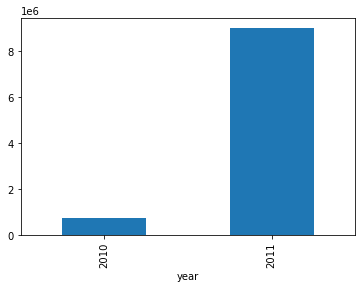

In [197]:
df.groupby('year')['TotalAmount'].sum().plot(kind = 'bar')

In [200]:
df['month'] = pd.DatetimeIndex(df['InvoiceDate']).month
df.tail()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,TotalAmount,UnitPrice,InvoiceDate,Country,year,month
541904,12680.0,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,10.20,0.85,2011-09-12 12:50:00,France,2011,9
541905,12680.0,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12.60,2.10,2011-09-12 12:50:00,France,2011,9
541906,12680.0,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,16.60,4.15,2011-09-12 12:50:00,France,2011,9
541907,12680.0,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,16.60,4.15,2011-09-12 12:50:00,France,2011,9
541908,12680.0,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,14.85,4.95,2011-09-12 12:50:00,France,2011,9


### 4. What are sales for different months ? 

<AxesSubplot:title={'center':'Sales month wise'}, xlabel='month,year'>

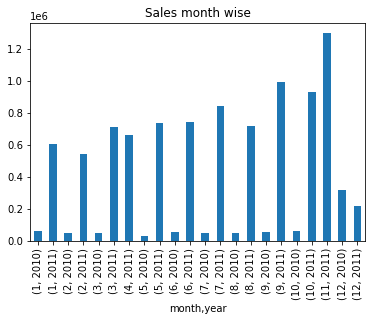

In [202]:
df.groupby(['month','year'])['TotalAmount'].sum().plot(kind = 'bar', title = 'Sales month wise')

### 5. Why dec 2011 has a drop as compared to nov 2011 ?

In [204]:
# Checking why dec 2011 has a drop comparing to nov 2011
get_2011 = df[(df['year'] == 2011)]
get_dec2011 = get_2011[(df['month'] == 'December')]
get_date=pd.DatetimeIndex(df['InvoiceDate']).date
get_date

<ipython-input-204-7ef107d9c95f>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  get_dec2011 = get_2011[(df['month'] == 'December')]


array([datetime.date(2010, 1, 12), datetime.date(2010, 1, 12),
       datetime.date(2010, 1, 12), ..., datetime.date(2011, 9, 12),
       datetime.date(2011, 9, 12), datetime.date(2011, 9, 12)],
      dtype=object)

### Answer > Because sales were up till 9th of december. 

### 6. From which countries are the top 5 customers who have spend highest amount of money ? 

In [207]:
money=df.groupby(by=['CustomerID','Country'],as_index=False)['TotalAmount'].sum()
print("Customer who spend most")
money.sort_values(by='TotalAmount',ascending=False).head()

Customer who spend most


,CustomerID,Country,TotalAmount
1711,14646.0,Netherlands,279489.02
4241,18102.0,United Kingdom,256438.49
3766,17450.0,United Kingdom,187482.17
1903,14911.0,EIRE,132572.62
57,12415.0,Australia,123725.45


### 7. Is amount spend correlated to quantity  ?

,CustomerID,Quantity,TotalAmount,UnitPrice,year,month
CustomerID,1.000000,-0.003600,-0.002274,-0.004560,-0.035955,0.006547
Quantity,-0.003600,1.000000,0.916096,-0.001238,0.001094,-0.001328
TotalAmount,-0.002274,0.916096,1.000000,-0.129296,-0.000158,-0.001281
UnitPrice,-0.004560,-0.001238,-0.129296,1.000000,0.000979,0.000790
year,-0.035955,0.001094,-0.000158,0.000979,1.000000,-0.090913
month,0.006547,-0.001328,-0.001281,0.000790,-0.090913,1.000000


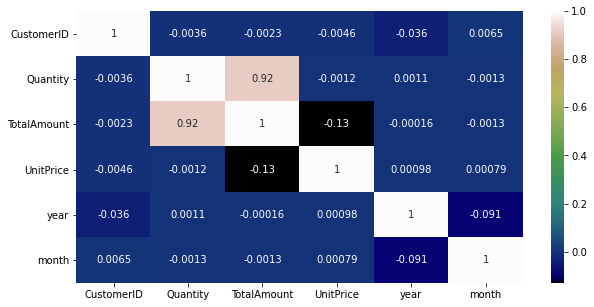

In [209]:
plt.figure(figsize=(10,5))
c=df.corr()
sns.heatmap(c,cmap="gist_earth",annot=True)
c

### Answer > YES

### 8. Which sales has seen uptrend in stocks ? 

AttributeError: 'AxesSubplot' object has no attribute 'set_xticketlabels'

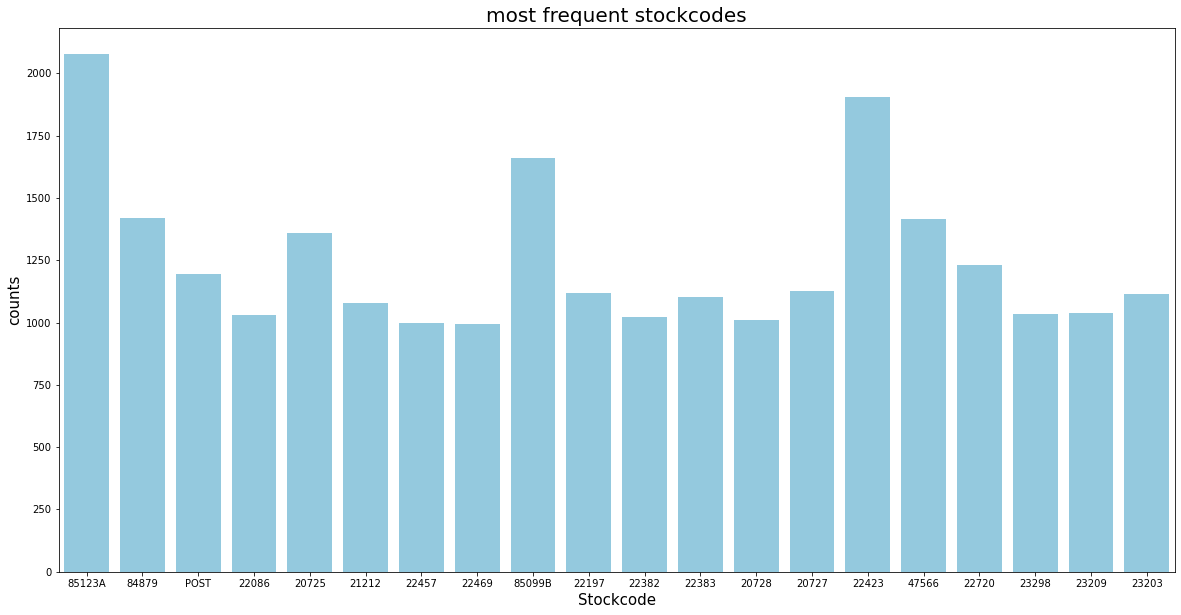

In [213]:
plt.figure(figsize=(20,10))
StockCode=df.StockCode.value_counts()[:20]
a=sns.countplot(x='StockCode',data=df[df.StockCode.isin(StockCode.index.values)],color='skyblue')
a.set_title("most frequent stockcodes",fontsize=20)
a.set_xlabel("Stockcode",fontsize=15)
a.set_ylabel("counts",fontsize=15)
a.set_xticketlabels(a.get_xticketlabels(),rotation=45)
plt.show()

### 9. Which product descriptions are commom ? 

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


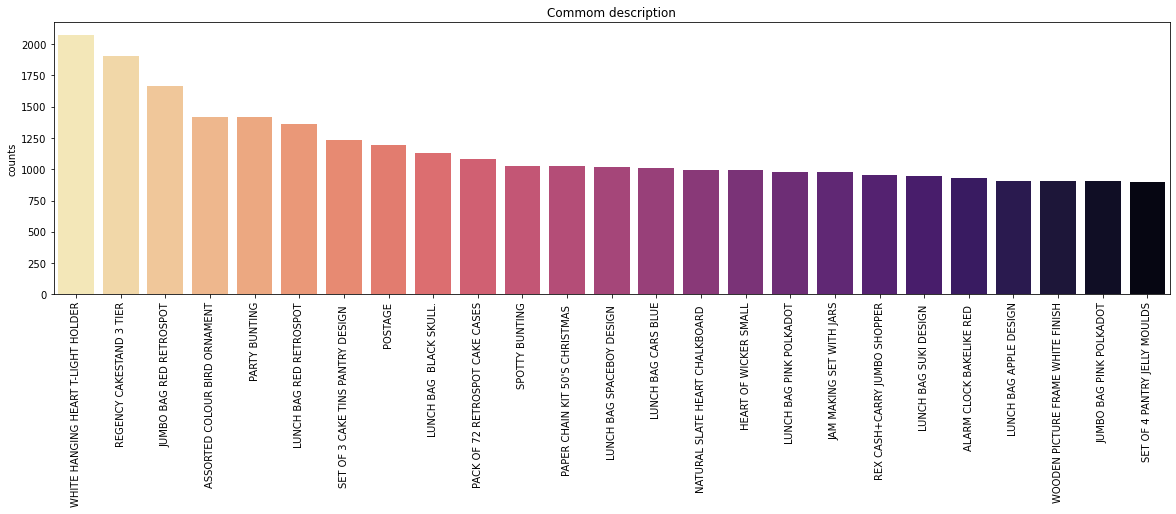

In [215]:
#which product descriptions are common 
des=df.Description.value_counts().sort_values(ascending=False).iloc[0:25]
plt.figure(figsize=(20,5))
sns.barplot(des.index,des.values,palette="magma_r")
plt.ylabel("counts")
plt.title("Commom description");
plt.xticks(rotation=90);

### 10. Which country has best consumer base ? 

<AxesSubplot:title={'center':'Most Customers for country'}, xlabel='Country'>

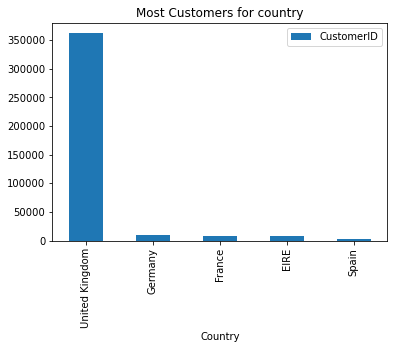

In [222]:
cus_id = pd.DataFrame(df.groupby('Country')['CustomerID'].count().sort_values(ascending = False))
cus_id[:5].plot(kind = 'bar', title = 'Most Customers for country')